In a regression problem the target value is a continuous one like a country's GDP or the price of a house.

In [3]:
import pandas as pd
boston = pd.read_csv('boston.csv.txt')
print(boston.head())
#Target value is MEDV medium value of unnocupied home in thousands of dollars

C:\Users\rodri\Anaconda3\envs\p n r\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\rodri\Anaconda3\envs\p n r\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [5]:
#.values returns a nparray from a pandas df
X = boston.drop('MEDV', axis = 1).values
y = boston['MEDV'].values

In [6]:
#Predicting house value from a single feature
#In this case the avg n° of rooms in a block 
#this corresponds to the 5th columns RM
X_rooms = X[:,5]

In [7]:
#so far both X_rooms and y are 1d arrays, let's add an extra one 
y = y.reshape(-1,1) #reshaping with -1 means that python has to figure out the missing dimentions such that the result is compatible
X_rooms = X_rooms.reshape(-1,1)
y.shape, X_rooms.shape

((506, 1), (506, 1))

In [8]:
#Plotting house value vs number of rooms
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.scatter(X_rooms, y)
plt.ylabel('Value of house / 1000 $')
plt.xlabel('Number of rooms')
plt.show()

<Figure size 640x480 with 1 Axes>

In [9]:
#Fitting a regression model
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [10]:
reg.fit(X_rooms,y)
prediction_space = np.linspace(min(X_rooms),max(X_rooms)).reshape(-1,1)

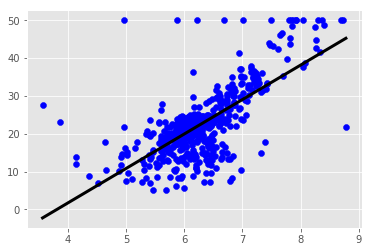

In [11]:
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth = 3)
plt.show()

## example from preprocessed Gapminder dataset

In [ ]:
#pandas methods like .info(), .describe(), .head() are super useful to explore a Dataset!
#To create heatmap to check correlations we use seaborn's heatmap function
#pandas .corr() computes pairwise correlation between columns
import seaborn as sns
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

To do a regression we usually define an error/loss/cost function that we'll try to minimize.
- Ordinary least squares (OLS)= minimize sum of squared of residuals
For higher dimesions linear regression works the same way y = a1x1 + ... + anxn + b

## for the boston dataset

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test) #In linear regression the default score is r^2

0.7112260057484953

## practice in preprocessed Gapminder

In [ ]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

#and now using test/train data and also getting root mean squared error
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


Potential pitfall for this process? Model performance depends on the way data is split, so it might not be representative of the model's ability to generalize
- Cross-validation solves this by splitting our data in n folds and using a different fold as test data n times. We end up with n different metrics that we can use for further analysis
- Usually called k-folde cross validation (KCV)
- more folds = more computationally expensive

In [13]:
#CV in scikit-learn
from sklearn.model_selection import cross_val_score
reg = linear_model.LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)
#R^2 because default for linear regr
print(cv_results)

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


In [14]:
np.mean(cv_results)

0.3532759243958813

In [15]:
# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv = 10)
print(np.mean(cvscores_10))

%timeit cross_val_score(reg, X, y, cv = 3)
%timeit cross_val_score(reg, X, y, cv = 10) 

-1.5841985220997372
0.20252899006056016
6.25 ms ± 263 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
20.6 ms ± 1.28 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Linear regression chooses a coeff for each feature variable but large coeff can lead to overfitting
- We'll penalize large coeffs: Regularization
- First example we'll see is Ridge regression

### Ridge regression

In [2]:
%%latex
Loss function = OLS loss function + $\alpha * \sum_{i=1}^{n} {a_i}^2$

<IPython.core.display.Latex object>

Alpha is a parameter for our model, and tunning alpha and k (for knn) needs some hyperparameter tuning.
- alpha controls model complexity. = 0 --> OLS --> can have overfitting
- large alpha can lead to underfitting

In [17]:
#Performing ridge regression in scikit-learn
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
ridge = Ridge(alpha = 0.1, normalize = True) #All variables on same scale
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.6996938275127315

### Lasso regression

Can be used for feature selection --> select important features of a dataset because it shrinks the coefficients of less important features to exactly 0.
- Lasso is good for feature selection but ridge should be used first

In [1]:
%%latex
Loss function = OLS loss function + $\alpha * \sum_{i=1}^{n} |a_i|
$

<IPython.core.display.Latex object>

In [21]:
#Performing lasso regression in scikit-learn
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
lasso = Lasso(alpha = 0.1, normalize = True) #All variables on same scale
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.595022953532855

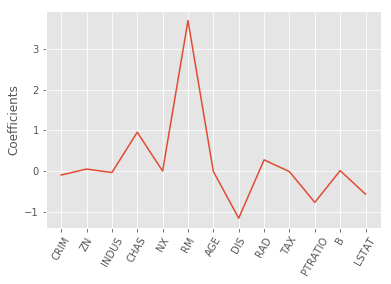

In [24]:
#Feature selection
from sklearn.linear_model import Lasso
names = boston.drop('MEDV', axis = 1).columns
lasso = Lasso(alpha = 0.1)
lasso_coef = lasso.fit(X,y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation = 60)
_ = plt.ylabel('Coefficients')
plt.show()

We directly see that the most important predictor for our target is Room number RM

## Practice with Gapminder

In [ ]:
#Lasso example
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha = 0.4, normalize = True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()


In [ ]:
#Ridge example
#Example on how to select the alpha for Ridge

#Function to plot R^2 score as well as standard error for each alpha
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)
